In [1]:
import pandas as pd
import numpy as np


In [2]:
!pip install pytorch_forecasting
!pip install pytorch_lightning

     |████████████████████████████████| 127 kB 27.2 MB/s 
     |████████████████████████████████| 584 kB 40.9 MB/s 
     |████████████████████████████████| 308 kB 52.5 MB/s 
     |████████████████████████████████| 210 kB 45.7 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 408 kB 47.6 MB/s 
     |████████████████████████████████| 136 kB 37.6 MB/s 
     |████████████████████████████████| 596 kB 52.5 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
     |████████████████████████████████| 144 kB 49.4 MB/s 
     |████████████████████████████████| 271 kB 68.7 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 78 kB 7.2 MB/s 
     |████████████████████████████████| 113 kB 43.9 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 146 kB 49.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11

In [3]:
import os 
import warnings

warnings.filterwarnings("ignore") 

In [4]:
import torch
torch.cuda.is_available()

False

In [5]:
data = pd.read_csv('eurusd.csv')
data.head()

,<DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0,2012.04.09\t00:00:00\t1.30961\t1.30965\t1.3066...
1,2012.04.09\t01:00:00\t1.30688\t1.30861\t1.3066...
2,2012.04.09\t02:00:00\t1.30848\t1.30876\t1.3044...
3,2012.04.09\t03:00:00\t1.30444\t1.30524\t1.3033...
4,2012.04.09\t04:00:00\t1.30509\t1.30618\t1.3050...


In [6]:
data.columns

Index(['<DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>'], dtype='object')

In [7]:
data_columns = ["DATE", "TIME", "OPEN", "HIGH", "LOW", "CLOSE", "TICKVOL", "VOL", "SPREAD"]

In [8]:
nRows = data.shape[0]
nCol = len(data_columns)
new_df = pd.DataFrame(index=range(nRows), columns=data_columns)
print(new_df.columns)

Index(['DATE', 'TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'TICKVOL', 'VOL',
       'SPREAD'],
      dtype='object')


In [9]:
from tqdm import tqdm
def sep_data(data):
    for idx, dat in tqdm(enumerate(data)):
        sep = dat[0].split('\t') 
        for idxx, col in enumerate(data_columns):
            new_df.iloc[idx].loc[col] = sep[idxx]

In [10]:
sep_data(data.values)
assert new_df.shape == (62002,9)

62002it [01:14, 830.43it/s]


In [11]:
new_df.shape

(62002, 9)

In [12]:
new_df.head()

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2012.04.09,00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13
1,2012.04.09,01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12
2,2012.04.09,02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12
3,2012.04.09,03:00:00,1.30444,1.30524,1.30330,1.30508,2322,0,13
4,2012.04.09,04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
np_df = np.array(new_df)

In [ ]:
# new_df.set_index('DATE',inplace=True)


In [ ]:
new_df.head()


,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
DATE,,,,,,,,
2012.04.09,00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13
2012.04.09,01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12
2012.04.09,02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12
2012.04.09,03:00:00,1.30444,1.30524,1.30330,1.30508,2322,0,13
2012.04.09,04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12


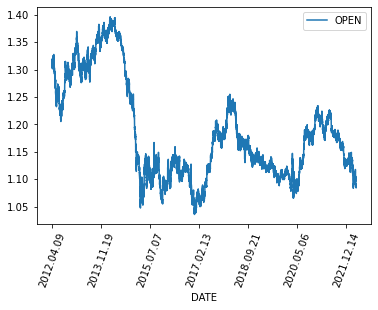

In [ ]:
new_df['OPEN'].astype(float).plot()
plt.legend()
plt.xticks(rotation = 70);

In [ ]:
# import sys
# sys.path.append('C:\\Users\\User\\.conda\\envs\\dsai\\lib\\site-packages') 
# from pytorch_forecasting.data.timeseries import TimeSeriesDataSet

In [13]:
import time
import datetime
# new_df['DATE'] = new_df.index

    

In [14]:
new_df

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD
0,2012.04.09,00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13
1,2012.04.09,01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12
2,2012.04.09,02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12
3,2012.04.09,03:00:00,1.30444,1.30524,1.30330,1.30508,2322,0,13
4,2012.04.09,04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12
...,...,...,...,...,...,...,...,...,...
61997,2022.04.08,14:00:00,1.08861,1.08881,1.08592,1.08638,3897,0,0
61998,2022.04.08,15:00:00,1.08637,1.08660,1.08504,1.08531,4443,0,0
61999,2022.04.08,16:00:00,1.08531,1.08581,1.08364,1.08399,6250,0,0
62000,2022.04.08,17:00:00,1.08399,1.08804,1.08388,1.08727,6825,0,0


In [ ]:
# timearr = []
# for date, time_ in zip(new_df['DATE'], new_df['TIME']):
#     datetime__ = date + " " + time_
#     s =  time.mktime(datetime.datetime.strptime(datetime__, "%Y.%m.%d %H:%M:%S").timetuple())
#     timearr.append(s)

In [ ]:
# new_df = new_df.reset_index()

In [15]:
new_df['DATE'] = pd.to_datetime(new_df['DATE'])

In [18]:
grp = pd.Series(np.ones((62000)))


In [19]:
new_df['grp'] = grp

In [20]:
new_df = new_df[:-2] 

In [120]:
new_df["time_idx"] = new_df["DATE"].dt.year * 12 + new_df["DATE"].dt.month
new_df["time_idx"] -= new_df["time_idx"].min()
new_df["month"] = new_df['DATE'].dt.month.astype(str).astype("category")
new_df["year"] = new_df['DATE'].dt.year.astype(str).astype("category")

In [268]:
idx = 0
time_ = []
count = 1
for i in new_df.values:
  time_.append(idx)
  if count == 12:
    idx = idx + 1
    count = 1
  count = count + 1

  

In [269]:
len(time_)

62000

In [182]:
time_idx = pd.Series(time_)
new_df['time_idx'] = time_idx

In [121]:
asd = new_df[new_df['DATE'].dt.year == 2012 ]
# print(len(asd[new_df['DATE'].dt.month == 4 ]))
# print(len(asd[new_df['DATE'].dt.month == 5 ]))
# print(len(asd[new_df['DATE'].dt.month == 6 ]))
# print(len(asd[new_df['DATE'].dt.month == 7 ]))
# print(len(asd[new_df['DATE'].dt.month == 8 ]))

new_df[new_df['grp'] == 0]

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,grp,time_idx,month,year


In [ ]:
# time_idx = pd.Series(arr)
# group = pd.Series(grp_arr)
# new_df["time_idx"] = time_idx
# new_df["group"] = group

C:\Users\User\.conda\envs\dsai\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\.conda\envs\dsai\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [183]:
new_df

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,grp,time_idx,month,year
0,2012-04-09,00:00:00,1.30961,1.30965,1.30662,1.30687,2151.0,0.0,13,1.0,0,4,2012
1,2012-04-09,01:00:00,1.30688,1.30861,1.30668,1.30847,1490.0,0.0,12,1.0,0,4,2012
2,2012-04-09,02:00:00,1.30848,1.30876,1.30441,1.30443,2226.0,0.0,12,1.0,0,4,2012
3,2012-04-09,03:00:00,1.30444,1.30524,1.30330,1.30508,2322.0,0.0,13,1.0,0,4,2012
4,2012-04-09,04:00:00,1.30509,1.30618,1.30504,1.30581,1379.0,0.0,12,1.0,0,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61995,2022-04-08,12:00:00,1.08668,1.08793,1.08644,1.08693,3586.0,0.0,0,1.0,2695,4,2022
61996,2022-04-08,13:00:00,1.08693,1.08921,1.08635,1.08862,3848.0,0.0,0,1.0,2695,4,2022
61997,2022-04-08,14:00:00,1.08861,1.08881,1.08592,1.08638,3897.0,0.0,0,1.0,2695,4,2022
61998,2022-04-08,15:00:00,1.08637,1.08660,1.08504,1.08531,4443.0,0.0,0,1.0,2695,4,2022


In [ ]:
# year_arr = [x.split(".")[0] for x in new_df["DATE"]]
# year_arr = pd.Series(year_arr)

In [68]:
new_df.iloc[668] 

DATE        2012-05-16 00:00:00
TIME                   20:00:00
OPEN                    1.27272
HIGH                    1.27388
LOW                     1.27151
CLOSE                   1.27224
TICKVOL                  2978.0
VOL                         0.0
SPREAD                       11
grp                         1.0
time_idx                     29
month                         5
year                       2012
Name: 668, dtype: object

In [123]:
new_df['OPEN'] = new_df["OPEN"].astype(float)
new_df['HIGH'] = new_df["HIGH"].astype(float)
new_df['CLOSE'] = new_df["CLOSE"].astype(float)
new_df['LOW'] = new_df["LOW"].astype(float)
new_df['TICKVOL'] = new_df["TICKVOL"].astype(float)
new_df['VOL'] = new_df["VOL"].astype(float)
new_df['SPREAD'] = new_df["SPREAD"].astype(int)

In [241]:
new_df['grp'] = new_df['grp'].astype('str')

In [242]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62000 entries, 0 to 61999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      62000 non-null  datetime64[ns]
 1   TIME      62000 non-null  object        
 2   OPEN      62000 non-null  float64       
 3   HIGH      62000 non-null  float64       
 4   LOW       62000 non-null  float64       
 5   CLOSE     62000 non-null  float64       
 6   TICKVOL   62000 non-null  float64       
 7   VOL       62000 non-null  float64       
 8   SPREAD    62000 non-null  int64         
 9   grp       62000 non-null  object        
 10  time_idx  62000 non-null  int64         
 11  month     62000 non-null  category      
 12  year      62000 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 5.3+ MB


In [243]:
import copy
from pathlib import Path
import numpy as np
import pandas as pd

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [255]:
from pytorch_forecasting.data.timeseries import TimeSeriesDataSet
max_prediction_length =  12
max_encoder_length = 24
training_cutoff = new_df["time_idx"].max() - max_prediction_length
    
timeseries = TimeSeriesDataSet(
     new_df[lambda x: x.time_idx <= training_cutoff],
    time_idx = "time_idx", 
    target = 'CLOSE',
    group_ids = ['grp'],
    min_encoder_length= 24,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["grp"],
    add_relative_time_idx=True,
    time_varying_known_reals=["time_idx", "OPEN", "HIGH", "LOW", "TICKVOL"],
      target_normalizer=GroupNormalizer(
        groups=["grp"], transformation="softplus"
    ),
    time_varying_unknown_categoricals=[], 
    add_target_scales=True,
    add_encoder_length=True,
    time_varying_unknown_reals = ['CLOSE'],
    allow_missing_timesteps=True)

In [256]:
timeseries.get_parameters() 

{'add_encoder_length': True,
 'add_relative_time_idx': True,
 'add_target_scales': True,
 'allow_missing_timesteps': True,
 'categorical_encoders': {'__group_id__grp': NaNLabelEncoder(),
  'grp': NaNLabelEncoder()},
 'constant_fill_strategy': {},
 'group_ids': ['grp'],
 'lags': {},
 'max_encoder_length': 24,
 'max_prediction_length': 12,
 'min_encoder_length': 24,
 'min_prediction_idx': 0,
 'min_prediction_length': 1,
 'predict_mode': False,
 'randomize_length': None,
 'scalers': {'CLOSE_center': StandardScaler(),
  'CLOSE_scale': StandardScaler(),
  'HIGH': StandardScaler(),
  'LOW': StandardScaler(),
  'OPEN': StandardScaler(),
  'TICKVOL': StandardScaler(),
  'encoder_length': StandardScaler(),
  'relative_time_idx': StandardScaler(),
  'time_idx': StandardScaler()},
 'static_categoricals': ['grp'],
 'static_reals': ['encoder_length', 'CLOSE_center', 'CLOSE_scale'],
 'target': 'CLOSE',
 'target_normalizer': GroupNormalizer(groups=['grp'], transformation='softplus'),
 'time_idx': 'ti

In [257]:
 
dataloader = timeseries.to_dataloader(batch_size=4)

In [258]:
timeseries.index

,time_first,time_last,time_diff_to_next,index_start,time,count,group_id,index_end,sequence_length
0,0,2683,0,0,0,2684,0,806,36
1,0,2683,0,1,0,2684,0,806,36
2,0,2683,0,2,0,2684,0,806,36
3,0,2683,0,3,0,2684,0,806,36
4,0,2683,0,4,0,2684,0,806,36
...,...,...,...,...,...,...,...,...,...
120237,0,2683,0,60905,2648,2684,0,61705,35
120238,0,2683,0,60905,2648,2684,0,61706,35
120239,0,2683,0,60905,2648,2684,0,61707,35
120240,0,2683,0,60905,2648,2684,0,61708,35


In [253]:
x, y = next(iter(dataloader))
# print("x =", x)
# print("\ny =", y)
# print("\nsizes of x =")
for key, value in x.items():
    print(f"\t{key} = {value.size()}")

	encoder_cat = torch.Size([4, 15920, 1])
	encoder_cont = torch.Size([4, 15920, 10])
	encoder_target = torch.Size([4, 15920])
	encoder_lengths = torch.Size([4])
	decoder_cat = torch.Size([4, 700, 1])
	decoder_cont = torch.Size([4, 700, 10])
	decoder_target = torch.Size([4, 700])
	decoder_lengths = torch.Size([4])
	decoder_time_idx = torch.Size([4, 700])
	groups = torch.Size([4, 1])
	target_scale = torch.Size([4, 2])


In [217]:
validation = TimeSeriesDataSet.from_dataset(timeseries, new_df, predict = True, stop_randomization = True)

batch_size = 4
training_dataloader = timeseries.to_dataloader(train=True, batch_size = batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size = batch_size , num_workers=0)

In [218]:
x, y = next(iter(training_dataloader))
# print("x =", x)
# print("\ny =", y)
# print("\nsizes of x =")
for key, value in x.items():
    print(f"\t{key} = {value.size()}")

	encoder_cat = torch.Size([4, 785, 0])
	encoder_cont = torch.Size([4, 785, 10])
	encoder_target = torch.Size([4, 785])
	encoder_lengths = torch.Size([4])
	decoder_cat = torch.Size([4, 12, 0])
	decoder_cont = torch.Size([4, 12, 10])
	decoder_target = torch.Size([4, 12])
	decoder_lengths = torch.Size([4])
	decoder_time_idx = torch.Size([4, 12])
	groups = torch.Size([4, 1])
	target_scale = torch.Size([4, 2])


In [219]:
for i, batch in training_dataloader:
    print((batch[0].shape))
    print('')
    print(len(i))
    print('')
    print(i.keys())
    print(i['encoder_lengths'].shape)
    print(i['encoder_target'].shape)
    print(i['encoder_cont'].shape)
    print(i['encoder_cat'].shape)
    
    break;

torch.Size([4, 12])

11

dict_keys(['encoder_cat', 'encoder_cont', 'encoder_target', 'encoder_lengths', 'decoder_cat', 'decoder_cont', 'decoder_target', 'decoder_lengths', 'decoder_time_idx', 'groups', 'target_scale'])
torch.Size([4])
torch.Size([4, 786])
torch.Size([4, 786, 10])
torch.Size([4, 786, 0])


In [191]:
for x, (y, weight) in iter(val_dataloader):
    print(x)
    break;

{'encoder_cat': tensor([], size=(1, 794, 0), dtype=torch.int64), 'encoder_cont': tensor([[[ 6.5167e+01,  4.4409e-16,  0.0000e+00,  ..., -3.2510e-01,
          -3.3083e+01, -5.6070e-01],
         [ 6.5167e+01,  4.4409e-16,  0.0000e+00,  ..., -2.2064e-02,
          -3.3042e+01, -5.6966e-01],
         [ 6.5167e+01,  4.4409e-16,  0.0000e+00,  ...,  8.2622e-02,
          -3.3000e+01, -5.8470e-01],
         ...,
         [ 6.5167e+01,  4.4409e-16,  0.0000e+00,  ..., -1.2565e-01,
          -1.2500e-01, -1.0716e+00],
         [ 6.5167e+01,  4.4409e-16,  0.0000e+00,  ...,  2.0089e+00,
          -8.3333e-02, -1.0526e+00],
         [ 6.5167e+01,  4.4409e-16,  0.0000e+00,  ...,  4.8521e-01,
          -4.1667e-02, -1.0503e+00]]]), 'encoder_target': tensor([[1.1356, 1.1348, 1.1334, 1.1330, 1.1334, 1.1336, 1.1346, 1.1336, 1.1317,
         1.1318, 1.1315, 1.1309, 1.1306, 1.1309, 1.1314, 1.1304, 1.1304, 1.1292,
         1.1299, 1.1306, 1.1304, 1.1297, 1.1326, 1.1319, 1.1352, 1.1346, 1.1351,
         1.

In [192]:
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer

actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
torch.Tensor.float(actuals - baseline_predictions).abs().mean().item()

0.003045032499358058

In [193]:
actuals

tensor([[1.0915, 1.0911, 1.0899, 1.0877, 1.0884, 1.0880, 1.0872, 1.0878, 1.0879,
         1.0875, 1.0864, 1.0862]])

In [194]:
baseline_predictions

tensor([[1.0913, 1.0913, 1.0913, 1.0913, 1.0913, 1.0913, 1.0913, 1.0913, 1.0913,
         1.0913, 1.0913, 1.0913]])

In [ ]:
import pytorch_lightning as pl
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# pl.seed_everything(42)
trainer = pl.Trainer(
gpus=0,  
)

tft = TemporalFusionTransformer.from_dataset(
timeseries,
learning_rate = 0.03,
hidden_size=16,
attention_head_size=1,
dropout=0.1,
hidden_continuous_size=8,
output_size=7,
loss=QuantileLoss(),
reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")


In [ ]:
res = trainer.tuner.lr_find(
tft,
train_dataloaders=training_dataloader,
    val_dataloaders = val_dataloader,
    max_lr = 10.0,
    min_lr=1e-6,
)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at /content/.lr_find_b3932f09-d4d0-467d-bb86-3fabd47ed8a1.ckpt


suggested learning rate: 0.5495408738576241


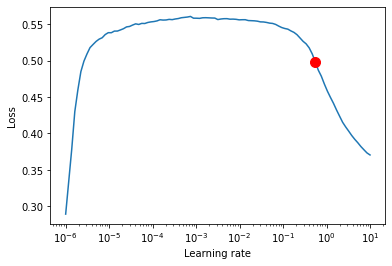

In [ ]:

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [195]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=10,
    gpus=0,
    weights_summary="top",
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
timeseries,
learning_rate = 0.03,
hidden_size=16,
attention_head_size=1,
dropout=0.1,
hidden_continuous_size=8,
output_size=7,
loss=QuantileLoss(),
reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Number of parameters in network: 24.0k


In [ ]:
training_dataloader

In [196]:
 trainer.fit(
    tft,
    train_dataloaders=training_dataloader,
    val_dataloaders=val_dataloader,
)


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 160   
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 4.4 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 3.7 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [261]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
OSError: [Errno 9] Bad file descriptor
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 232, in _feed
    close()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exception, another exception occurred:

Traceback 

In [262]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(0.0055)

In [263]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [264]:
raw_predictions['encoder_attention'].shape

torch.Size([1, 12, 1, 794])

In [273]:
raw_predictions.keys()

('prediction',
 'encoder_attention',
 'decoder_attention',
 'static_variables',
 'encoder_variables',
 'decoder_variables',
 'decoder_lengths',
 'encoder_lengths')

In [283]:
x.keys()

dict_keys(['encoder_cat', 'encoder_cont', 'encoder_target', 'encoder_lengths', 'decoder_cat', 'decoder_cont', 'decoder_target', 'decoder_lengths', 'decoder_time_idx', 'groups', 'target_scale'])

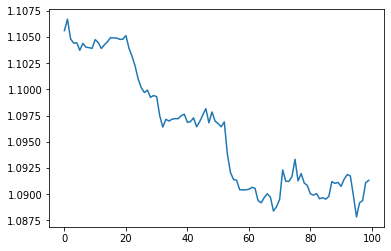

In [290]:
plt.plot(x['encoder_target'][0][-100:])

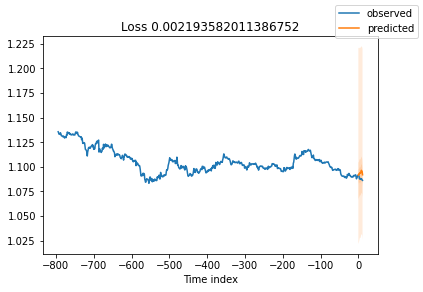

In [267]:
best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True, predict_attention=False);

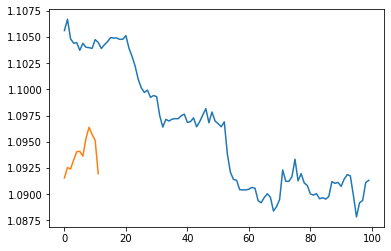

In [317]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
pred, x = best_tft.predict(val_dataloader, mode="prediction", return_x=True)

import matplotlib.pyplot as plt

plt.plot(x['encoder_target'][0][-100:])
plt.plot(pred[0]); 

In [330]:
arr = []

for i in range(-88, 12):
  arr.append(i)

In [ ]:
arr

In [332]:
obs_ = pd.DataFrame(pd.Series(x['encoder_target'][0][-100:]), columns=['Observed'])
pred_ = pd.DataFrame(pd.Series(pred[0]), columns=['Prediction'])

In [333]:
obs_['idx'] = arr

In [334]:
obs_.set_index('idx', inplace=True)

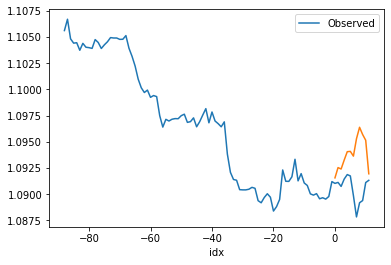

In [346]:
obs_.plot()
plt.plot(pred_); 
